In [4]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd 



In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [6]:
#setting up the url
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [7]:
# read html file and store into a dataframe
df = pd.read_html(url, index_col=0)[0]
#df=pd.read_html(url)[0]
df.head(10)

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
57,2012-08-21,15,158,6,-78.0,740.0
68,2012-08-22,16,158,6,-77.0,740.0
79,2012-08-23,17,159,6,-76.0,742.0
112,2012-08-27,21,161,6,-74.0,741.0


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   terrestrial_date  1867 non-null   object 
 1   sol               1867 non-null   int64  
 2   ls                1867 non-null   int64  
 3   month             1867 non-null   int64  
 4   min_temp          1867 non-null   float64
 5   pressure          1867 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 102.1+ KB


In [10]:
#convert the "terrestrial_date" column type to datetime 
df['terrestrial_date']= pd.to_datetime(df['terrestrial_date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   terrestrial_date  1867 non-null   datetime64[ns]
 1   sol               1867 non-null   int64         
 2   ls                1867 non-null   int64         
 3   month             1867 non-null   int64         
 4   min_temp          1867 non-null   float64       
 5   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 102.1 KB


In [12]:
#find out the month unqiue value counts 
month_mars = df['month'].value_counts()
month_mars_num=len(month_mars)

In [13]:
print(f'There are {month_mars_num} months on Mars.')

There are 12 months on Mars.


In [14]:
# find out the start_date and end_date of the dateframe
start_date = df['sol'].min()
end_date = df['sol'].max()

In [15]:
duration = end_date - start_date
duration

1967

In [16]:
print(f'There are {duration} Martian days worth of data existing in the scraped dataset.' )

There are 1967 Martian days worth of data existing in the scraped dataset.


In [17]:
#USE groupby to get the monthly average lowest temp
avg_temp_monthly = df.groupby(['month'])['min_temp'].mean()
avg_temp_monthly

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

(-90.0, 0.0)

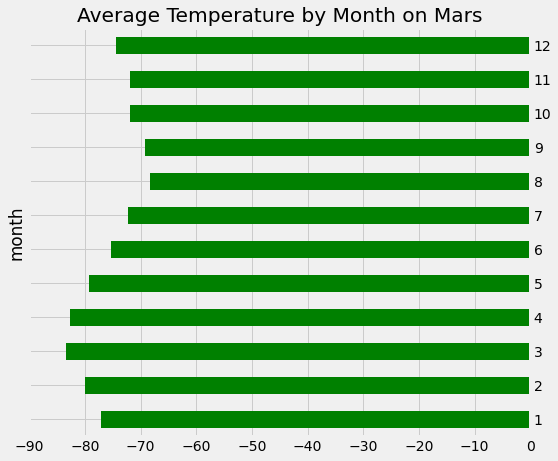

In [18]:
from calendar import month



plt1= avg_temp_monthly.plot.barh(title ='Average Temperature by Month on Mars', ylabel = 'average temperature(Celsius)', color="green", figsize=(8, 7))

plt1.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt1.set_xlim([-90,0])





In [19]:
print("Summary: we can conclude from the bar chart, on average, the lowest temperature is in March and the highest temperature is in August on Mars.  ")

Summary: we can conclude from the bar chart, on average, the lowest temperature is in March and the highest temperature is in August on Mars.  


In [20]:
avg_pressure_df =df.groupby(['month'])['pressure'].mean()


(0.0, 1000.0)

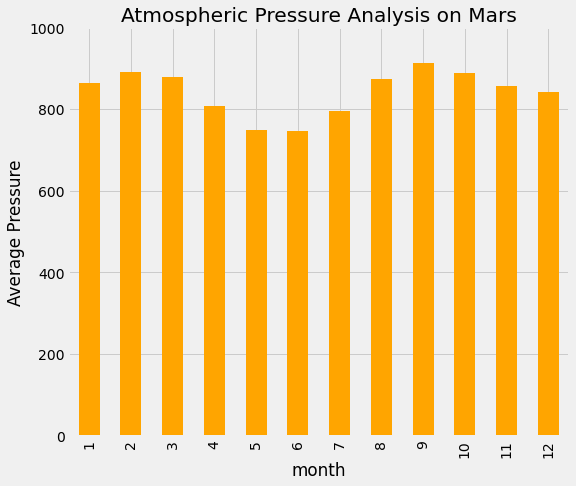

In [21]:

plot2= avg_pressure_df.plot(kind= 'bar', ylabel='Average Pressure', title='Atmospheric Pressure Analysis on Mars', color="orange", figsize=(8, 7))
plot2.set_ylim([0,1000])


In [22]:
print("The monthly average pressure on Mars is the lowest in June and July, on the contrary, the highest is in September")

The monthly average pressure on Mars is the lowest in June and July, on the contrary, the highest is in September


<AxesSubplot:title={'center':'Martian Days vs. Solar longitude'}, xlabel='sol'>

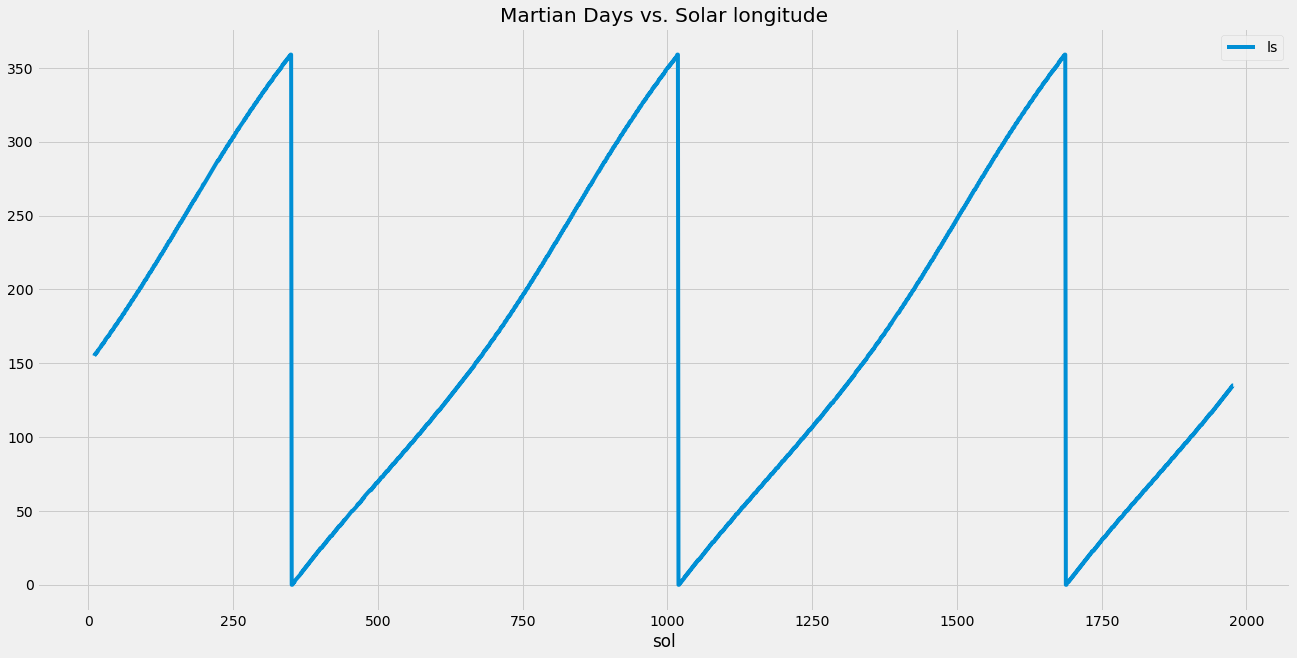

In [23]:
# when the solar latitude ==0 , finds the pattern


df.plot(y = 'ls', x= "sol", figsize=(20,10), title= 'Martian Days vs. Solar longitude')

In [24]:
# Locate sol when ls = '0'
df.loc[df['ls']== 0]['sol']

id
320      351
319      352
954     1019
938     1020
1606    1688
1610    1689
Name: sol, dtype: int64

In [26]:
Martian_days_year=((1019-351)+(1688-1019))/2

In [27]:
print(f"There are about {Martian_days_year} days existing in a Martian year.")

There are about 668.5 days existing in a Martian year.


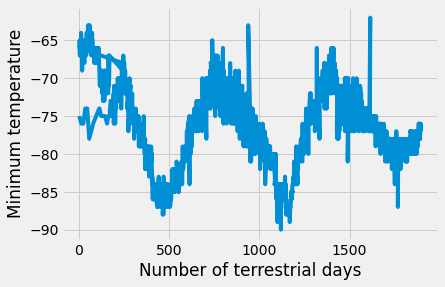

In [28]:
df.min_temp.plot()
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()

In [29]:
print("As we can see in the plot above, the three repeating pattern of the daily lowest temperature, we could estimate that there are about 668.5 days in a Martian year.")

As we can see in the plot above, the three repeating pattern of the daily lowest temperature, we could estimate that there are about 668.5 days in a Martian year.


In [30]:

df.to_csv('mars_data_part2.csv', encoding='utf-8')

